In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Load your shopping trends file
df = pd.read_csv("shein_shopping.csv")

In [29]:
# Convert Week column to datetime
df["Week"] = pd.to_datetime(df["Week"], errors="coerce")
df = df.dropna(subset=["Week"])


In [30]:

# Extract year to use on the x-axis
df["Year"] = df["Week"].dt.year

In [31]:
df

,Week,shein: (United States),Year
0,2020-11-08,35,2020
1,2020-11-15,35,2020
2,2020-11-22,37,2020
3,2020-11-29,40,2020
4,2020-12-06,31,2020
...,...,...,...
257,2025-10-12,39,2025
258,2025-10-19,50,2025
259,2025-10-26,40,2025
260,2025-11-02,50,2025


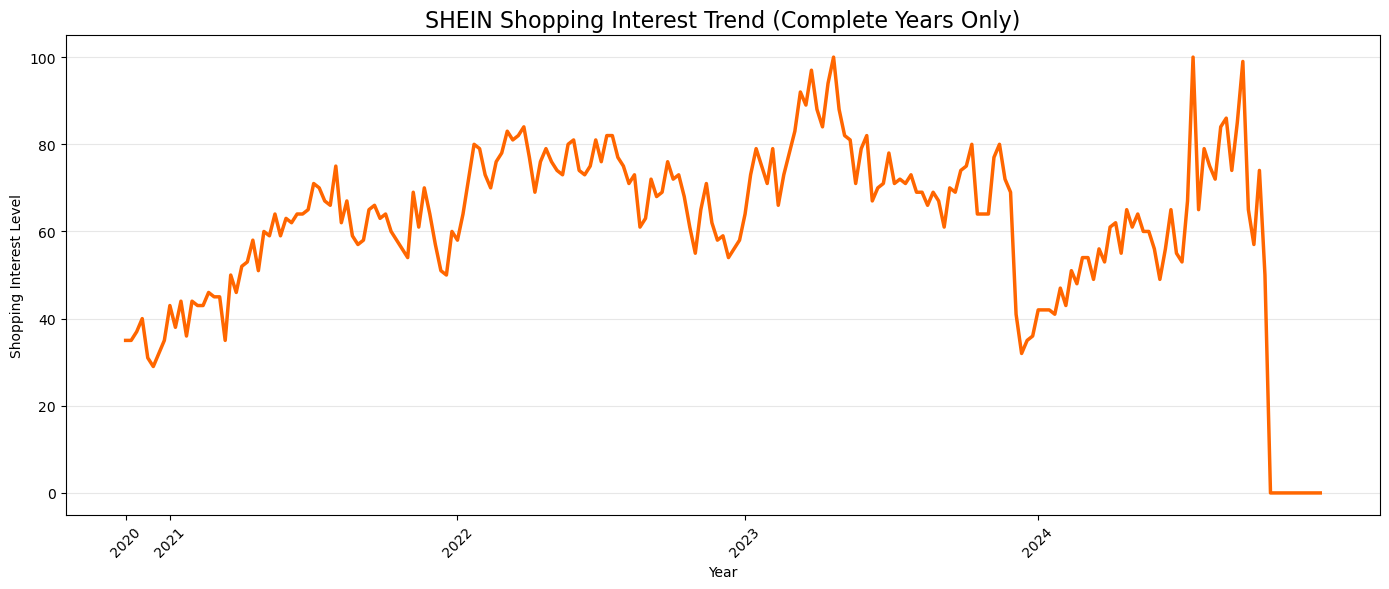

In [32]:
# Remove 2025 because it's incomplete
df_filtered = df[df["Week"].dt.year < 2025]

plt.figure(figsize=(14,6))
plt.plot(df_filtered["Week"], df_filtered["shein: (United States)"],
         linewidth=2.5, color="#ff6600")

plt.title("SHEIN Shopping Interest Trend (Complete Years Only)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Shopping Interest Level")

years = sorted(df_filtered["Week"].dt.year.unique())
year_ticks = [df_filtered[df_filtered["Week"].dt.year == y]["Week"].iloc[0] for y in years]
plt.xticks(year_ticks, years, rotation=45)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


In [33]:
# Load dataset
df2 = pd.read_csv("sf_shopping.csv", skiprows=1)
df2.columns = ["Week", "Shopping_Interest"]


In [34]:
# Convert Week to proper datetime
df2["Week"] = pd.to_datetime(df2["Week"], errors="coerce")
df2 = df2.dropna()


In [35]:
# Remove incomplete 2025
df2 = df2[df2["Week"].dt.year < 2025]


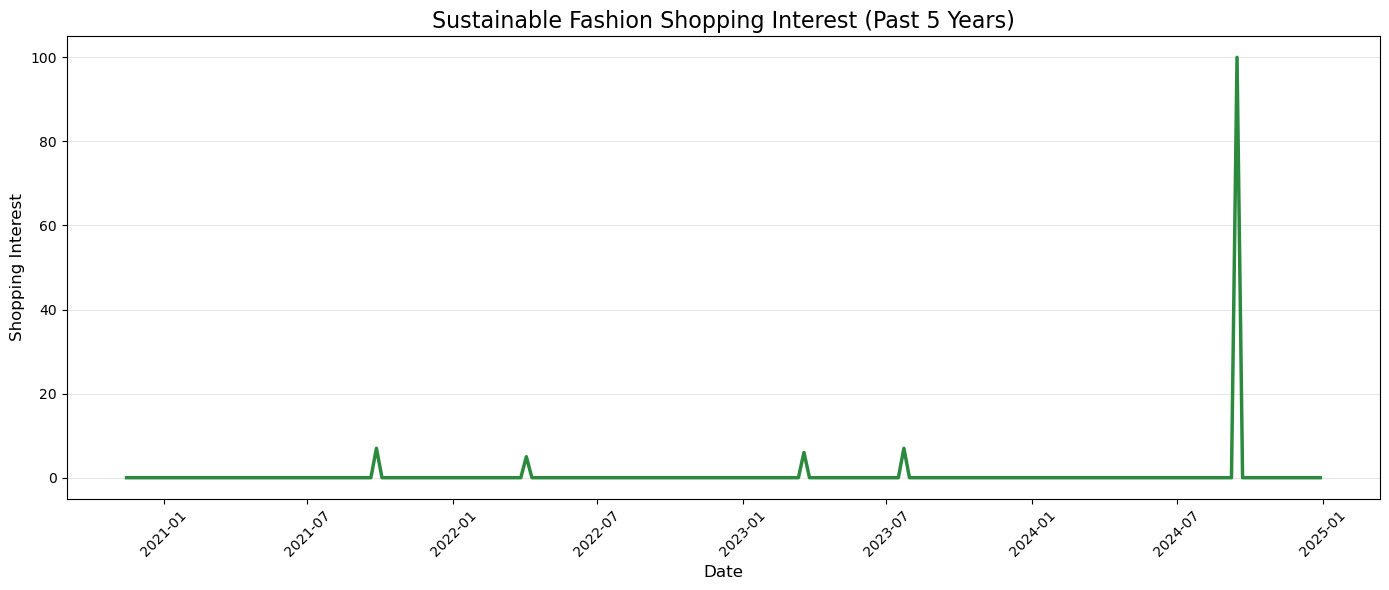

In [36]:
plt.figure(figsize=(14,6))

plt.plot(df2["Week"], df2["Shopping_Interest"],
         linewidth=2.5, color="#2b8a3e")

plt.title("Sustainable Fashion Shopping Interest (Past 5 Years)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Shopping Interest", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

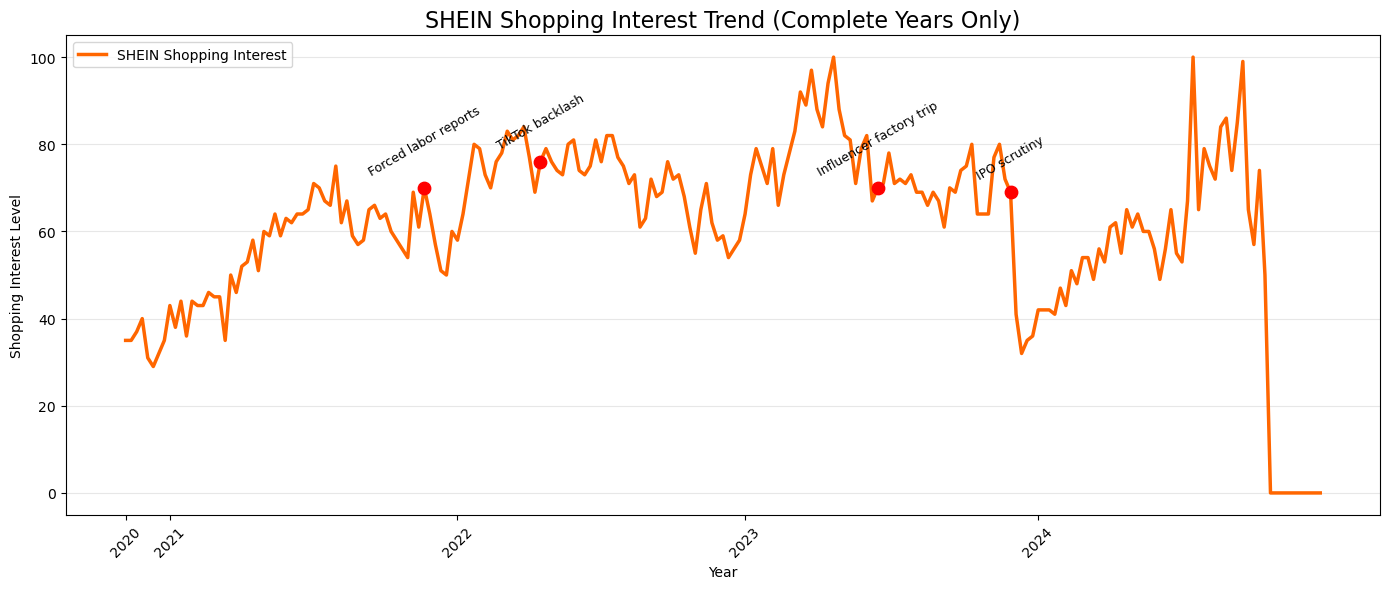

In [38]:


# Convert and filter out 2025 data
df["Week"] = pd.to_datetime(df["Week"], errors="coerce")
df_filtered = df[df["Week"].dt.year <= 2024]

plt.figure(figsize=(14,6))
plt.plot(df_filtered["Week"], df_filtered["shein: (United States)"],
         linewidth=2.5, color="#ff6600", label="SHEIN Shopping Interest")

# Controversy dates
events = [
    ("2021-11-24", "Forced labor reports"),
    ("2022-04-15", "TikTok backlash"),
    ("2023-06-21", "Influencer factory trip"),
    ("2023-12-01", "IPO scrutiny")
]

# Plot circles for each controversy (nearest week)
for date_str, label in events:
    event_date = pd.to_datetime(date_str)
    # find the closest date in your df to that event
    closest_date = df_filtered.iloc[(df_filtered["Week"] - event_date).abs().argsort()[:1]]["Week"].values[0]
    y_val = df_filtered.loc[df_filtered["Week"] == pd.Timestamp(closest_date), "shein: (United States)"].values[0]
    
    plt.scatter(pd.Timestamp(closest_date), y_val, color="red", s=80, zorder=5)
    plt.text(pd.Timestamp(closest_date), y_val + 3, label, fontsize=9, color="black", ha="center", rotation=30)

# Labels and styling
plt.title("SHEIN Shopping Interest Trend (Complete Years Only)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Shopping Interest Level")

# Year tick formatting
years = sorted(df_filtered["Week"].dt.year.unique())
year_ticks = [df_filtered[df_filtered["Week"].dt.year == y]["Week"].iloc[0] for y in years]
plt.xticks(year_ticks, years, rotation=45)

plt.grid(axis="y", alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
